In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [121]:
ratings_df = pd.read_csv('./Data/user_interactions.csv')

## Ratings Analysis

In [122]:
ratings_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [123]:
weighted_ratings_df = ratings_df.copy()
weighted_ratings_df = weighted_ratings_df.drop(['date', 'review'], axis=1)
weighted_ratings_df = weighted_ratings_df.groupby(['recipe_id', 'rating']).count()
weighted_ratings_df = weighted_ratings_df.rename(columns={"user_id": "users"})
weighted_ratings_df.reset_index(inplace=True)
weighted_ratings_df.head()

,recipe_id,rating,users
0,38,4,3
1,38,5,1
2,39,3,1
3,40,1,1
4,40,4,2
...,...,...,...
367682,537459,5,1
367683,537485,5,1
367684,537543,0,1
367685,537671,0,1


<AxesSubplot:>

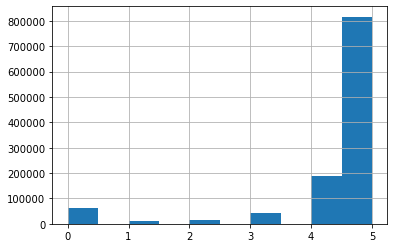

In [124]:
weighted_ratings_df['rating'].hist(histtype='bar', weights=weighted_ratings_df['users'])

In [125]:
# Create a SentimentIntensityAnalyzer object.
vader_obj = SentimentIntensityAnalyzer()
def sentiment_scores(sentences):
    try: 
        scores = []
        for sentence in sentences:
            if(sentence != '' and not pd.isnull(sentence) and not pd.isna(sentence)):
                sentiment_dict = vader_obj.polarity_scores(sentence)
                scores.append(sentiment_dict['compound'])
            else:
                scores.append(0)
        return scores
    except Exception as e:
        print("sentence", sentence)
        print("Exception occured", str(e))

In [126]:
ratings_df['polarity_score'] = sentiment_scores(ratings_df['review'].values)
ratings_df.drop(['user_id', 'review'], axis=1, inplace=True)

In [132]:
ratings_df.to_csv('./Data/ratings_with_polarity_score.csv', index=False)

In [134]:
ratings_df.head()

,user_id,recipe_id,date,rating,review,polarity_score
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,0.7184
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",0.8895
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,0.8865
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,0.5994
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",0.0000


## VADER polarity score analysis:

In [129]:
negative_ratings_df = ratings_df[ratings_df['polarity_score']<0]
# analysing a sample
negative_ratings_df.iloc[54]['review']

'I used 1 c canola oil and 1 c veggie oil &amp; only 1-1/2 tsp of salt.  Tastes very similar to the real Best Foods mayo but without all the preservatives and NO GMO!  Will do again and use garlic and red wine vinegar.  I don&#039;t think I&#039;ll be buying store-bought mayo again!'

In [130]:
negative_ratings_df.iloc[54]

user_id                                                     5210524
recipe_id                                                    207860
date                                                     2015-03-17
rating                                                            5
review            I used 1 c canola oil and 1 c veggie oil &amp;...
polarity_score                                              -0.4373
Name: 1811, dtype: object

In [131]:
sentence = """I used 1 c canola oil and 1 c veggie oil &amp; only 1-1/2 tsp of salt.  Tastes very similar to the real Best Foods mayo but without all the preservatives and NO GMO!  Will do again and use garlic and red wine vinegar.  I don&#039;t think I&#039;ll be buying store-bought mayo again!"""
vader_obj.polarity_scores(sentence)

{'neg': 0.077, 'neu': 0.878, 'pos': 0.045, 'compound': -0.4373}